# Synthea Capstone Project - Exploratory Data Analysis

#### In the exploratory data analysis (EDA) section of this project, features of the data are visualized and explored to determine which attributes may be most useful in modeling steps. All string data will be transformed into numerical data where possible to assist in analysis and in preparation for modeling. Any trends or correlations in the data will be noted.

Relevant modules are imported into the workspace.

In [76]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import date
from sklearn import preprocessing
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

First, the dataframe from the data wrangling section of the capstone is loaded into the workspace and observed.

In [78]:
df = pd.read_csv('../data/synthea_data_wrangling.csv')
df.head()

,Unnamed: 0,RACE,ETHNICITY,GENDER,CITY,STATE,INCOME,AGE,encounters_cost,num_encounters,...,Respiratory rate,Sodium [Moles/volume] in Blood,Stress level,Systolic Blood Pressure,Tobacco smoking status,Total score [AUDIT-C],Total score [DAST-10],Total score [HARK],Triglycerides,Urea nitrogen [Mass/volume] in Blood
0,0,white,nonhispanic,M,Lincoln,Alabama,21478,3,8748.80,4.0,...,13.0,NaN,0,97.0,0,NaN,NaN,NaN,NaN,NaN
1,1,white,nonhispanic,M,Moody,Alabama,89823,42,4659.91,5.0,...,15.0,139.0,4,138.0,0,1.0,1.0,0.0,120.9,18.7
2,2,white,nonhispanic,M,Mobile,Alabama,54400,23,NaN,NaN,...,14.0,NaN,1,105.0,0,8.0,1.0,0.0,NaN,NaN
3,3,black,nonhispanic,M,Hoover,Alabama,35376,16,2817.62,4.0,...,14.0,NaN,0,112.0,0,NaN,NaN,NaN,NaN,NaN
4,4,white,nonhispanic,M,Huntsville,Alabama,93837,34,4301.42,2.0,...,13.0,NaN,1,146.0,0,0.0,1.0,0.0,116.6,NaN


There appears to be an extra unnamed column, so that will be dropped.

In [80]:
df = df.drop('Unnamed: 0', axis = 1)

In [81]:
df.shape

(5000, 60)

In [82]:
df.describe()

,INCOME,AGE,encounters_cost,num_encounters,meds_cost,num_meds,procedures_cost,num_procedures,immunizations_cost,num_immunizations,...,Respiratory rate,Sodium [Moles/volume] in Blood,Stress level,Systolic Blood Pressure,Tobacco smoking status,Total score [AUDIT-C],Total score [DAST-10],Total score [HARK],Triglycerides,Urea nitrogen [Mass/volume] in Blood
count,5000.00000,5000.000000,4660.000000,4660.000000,3.431000e+03,3431.000000,4384.000000,4384.000000,4226.000000,4226.000000,...,4962.000000,1974.000000,5000.000000,4962.000000,5000.000000,3116.000000,3129.000000,3336.000000,2895.000000,1974.00000
mean,87462.89980,37.868600,15907.685077,6.127682,4.241395e+03,7.934130,18415.600123,19.651004,235.988642,1.735211,...,13.998227,139.971733,1.565600,119.037525,0.216800,1.623556,1.181208,0.129197,132.316995,13.52614
std,131846.10156,23.516512,35591.339255,13.824188,4.721942e+04,21.361822,36555.648629,27.436335,269.515714,1.981733,...,1.188643,2.331853,1.359436,14.766314,0.423124,1.858168,1.208751,0.591118,31.516045,3.77836
min,34.00000,-1.000000,59.640000,1.000000,9.000000e-01,1.000000,61.960000,1.000000,136.000000,1.000000,...,12.000000,136.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,100.000000,7.00000
25%,26819.75000,18.000000,1367.777500,2.000000,1.975600e+02,1.000000,2973.487500,6.000000,136.000000,1.000000,...,13.000000,137.900000,0.000000,109.000000,0.000000,1.000000,1.000000,0.000000,113.800000,10.30000
50%,54104.50000,37.000000,4740.970000,3.000000,5.850400e+02,2.000000,6484.190000,12.000000,136.000000,1.000000,...,14.000000,140.000000,1.000000,119.000000,0.000000,1.000000,1.000000,0.000000,128.000000,13.50000
75%,95080.25000,56.000000,11366.022500,5.000000,3.393460e+03,5.000000,14594.020000,19.000000,272.000000,2.000000,...,15.000000,141.900000,2.000000,130.000000,0.000000,2.000000,2.000000,0.000000,142.000000,16.80000
max,986892.00000,109.000000,709730.300000,129.000000,2.726640e+06,364.000000,714866.230000,205.000000,2720.000000,20.000000,...,27.500000,144.000000,5.000000,172.000000,2.000000,12.000000,10.000000,4.000000,489.900000,20.00000


In [83]:
pd.options.display.max_rows = 60
df.dtypes

RACE                                                                         object
ETHNICITY                                                                    object
GENDER                                                                       object
CITY                                                                         object
STATE                                                                        object
INCOME                                                                        int64
AGE                                                                           int64
encounters_cost                                                             float64
num_encounters                                                              float64
meds_cost                                                                   float64
num_meds                                                                    float64
procedures_cost                                                             

In [84]:
pd.options.display.max_rows = 10

This dataframe contains 5000 unique patients and 63 features. There are both string and numeric features, and there are still missing values that need to be accounted for in future steps. For now, some of the string features will be converted into numeric features.

The 'GENDER' column will be turned to a binary notation, with Male as 0 and Female as 1. The 'ETHNICITY' column will also be turned into a binary notation, with nonhispanic as 0 and hispanic as 1.

In [87]:
df['GENDER'] = [1 if x == 'M' else 0 for x in df['GENDER']]
df['ETHNICITY'] = [0 if x == 'nonhispanic' else 1 for x in df['ETHNICITY']]

Additionally, the 'RACE' column will be switched into a numerical format using one-hot encoding.

In [89]:
df_dummies = pd.get_dummies(df['RACE'], drop_first = False)
df = pd.concat([df, df_dummies], axis = 1)
df = df.drop(['RACE', 'other'], axis = 1)
df['asian'] = df['asian'].astype(int)
df['black'] = df['black'].astype(int)
df['hawaiian'] = df['hawaiian'].astype(int)
df['native'] = df['native'].astype(int)
df['white'] = df['white'].astype(int)

In [90]:
df.head()

,ETHNICITY,GENDER,CITY,STATE,INCOME,AGE,encounters_cost,num_encounters,meds_cost,num_meds,...,Total score [AUDIT-C],Total score [DAST-10],Total score [HARK],Triglycerides,Urea nitrogen [Mass/volume] in Blood,asian,black,hawaiian,native,white
0,0,1,Lincoln,Alabama,21478,3,8748.80,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
1,0,1,Moody,Alabama,89823,42,4659.91,5.0,14.90,2.0,...,1.0,1.0,0.0,120.9,18.7,0,0,0,0,1
2,0,1,Mobile,Alabama,54400,23,NaN,NaN,NaN,NaN,...,8.0,1.0,0.0,NaN,NaN,0,0,0,0,1
3,0,1,Hoover,Alabama,35376,16,2817.62,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
4,0,1,Huntsville,Alabama,93837,34,4301.42,2.0,290.14,2.0,...,0.0,1.0,0.0,116.6,NaN,0,0,0,0,1


Next, the states column will be turned into a numeric format. There are multiple ways in which to do this, including one hot encoding, label encoding, and target encoding. Since there are 50 states, one hot encoding would add 49 additional columns, which could cause problems with dimensionality. Label encoding would give each state an integer value from 0 to 49, but since there is no inherent ranking to the states, the behavior of this feature could be disruptive to modeling. To introduce target encoding, the population of each state will be used. This could give some information on the availibility of healthcare within a state, as a state with a larger population would likely have more cities and thus more healthcare facilities. To do this, state data from Wikipedia is imported and the population column is merged with the patients dataframe. Then, the state and city columns can be dropped.

In [92]:
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)
usa_states = usa_states[0]
usa_states.head()

Name & postal abbs. [1]                                 Cities               \
  Name & postal abbs. [1] Name & postal abbs. [1].1      Capital   Largest[5]   
0                 Alabama                        AL   Montgomery   Birmingham   
1                  Alaska                        AK       Juneau    Anchorage   
2                 Arizona                        AZ      Phoenix      Phoenix   
3                Arkansas                        AR  Little Rock  Little Rock   
4              California                        CA   Sacramento  Los Angeles   

  Established[A] Population [B][3] Total area[4]          Land area[4]  \
  Established[A] Population [B][3]           mi2      km2          mi2   
0   Dec 14, 1819           4903185         52420   135767        50645   
1    Jan 3, 1959            731545        665384  1723337       570641   
2   Feb 14, 1912           7278717        113990   295234       113594   
3   Jun 15, 1836           3017804         53179   137732        52035   
4    Sep 9, 1850          39512223        163695   423967       155779   

           Water area[4]         Number of Reps.  
       km2           mi2     km2 Number of Reps.  
0   131171          1775    4597               7  
1  1477953         94743  245384               1  
2   294207           396    1026               9  
3   134771          1143    2961               4  
4   403466          7916   20501              53

In [93]:
usa_states = usa_states.iloc[:, [0, 5]]
usa_states.columns = ['STATE', 'STATE_POPULATION']
usa_states.head()

,STATE,STATE_POPULATION
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [94]:
df = df.merge(usa_states, on='STATE', how='left')

The state and city columns are now dropped.

In [96]:
df = df.drop(['STATE', 'CITY'], axis = 1)
df.head()

,ETHNICITY,GENDER,INCOME,AGE,encounters_cost,num_encounters,meds_cost,num_meds,procedures_cost,num_procedures,...,Total score [DAST-10],Total score [HARK],Triglycerides,Urea nitrogen [Mass/volume] in Blood,asian,black,hawaiian,native,white,STATE_POPULATION
0,0,1,21478,3,8748.80,4.0,NaN,NaN,8263.80,17.0,...,NaN,NaN,NaN,NaN,0,0,0,0,1,4903185.0
1,0,1,89823,42,4659.91,5.0,14.90,2.0,5968.30,13.0,...,1.0,0.0,120.9,18.7,0,0,0,0,1,4903185.0
2,0,1,54400,23,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,0,0,0,0,1,4903185.0
3,0,1,35376,16,2817.62,4.0,NaN,NaN,4109.91,11.0,...,NaN,NaN,NaN,NaN,0,1,0,0,0,4903185.0
4,0,1,93837,34,4301.42,2.0,290.14,2.0,5368.22,12.0,...,1.0,0.0,116.6,NaN,0,0,0,0,1,4903185.0


In [97]:
pd.options.display.max_rows = 63
df.dtypes

ETHNICITY                                                                     int64
GENDER                                                                        int64
INCOME                                                                        int64
AGE                                                                           int64
encounters_cost                                                             float64
num_encounters                                                              float64
meds_cost                                                                   float64
num_meds                                                                    float64
procedures_cost                                                             float64
num_procedures                                                              float64
immunizations_cost                                                          float64
num_immunizations                                                           

In [98]:
pd.options.display.max_rows = 10
df.head()

,ETHNICITY,GENDER,INCOME,AGE,encounters_cost,num_encounters,meds_cost,num_meds,procedures_cost,num_procedures,...,Total score [DAST-10],Total score [HARK],Triglycerides,Urea nitrogen [Mass/volume] in Blood,asian,black,hawaiian,native,white,STATE_POPULATION
0,0,1,21478,3,8748.80,4.0,NaN,NaN,8263.80,17.0,...,NaN,NaN,NaN,NaN,0,0,0,0,1,4903185.0
1,0,1,89823,42,4659.91,5.0,14.90,2.0,5968.30,13.0,...,1.0,0.0,120.9,18.7,0,0,0,0,1,4903185.0
2,0,1,54400,23,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,0,0,0,0,1,4903185.0
3,0,1,35376,16,2817.62,4.0,NaN,NaN,4109.91,11.0,...,NaN,NaN,NaN,NaN,0,1,0,0,0,4903185.0
4,0,1,93837,34,4301.42,2.0,290.14,2.0,5368.22,12.0,...,1.0,0.0,116.6,NaN,0,0,0,0,1,4903185.0


To begin exploratory data analysis, histograms are constructed for each variable to understand their distributions.

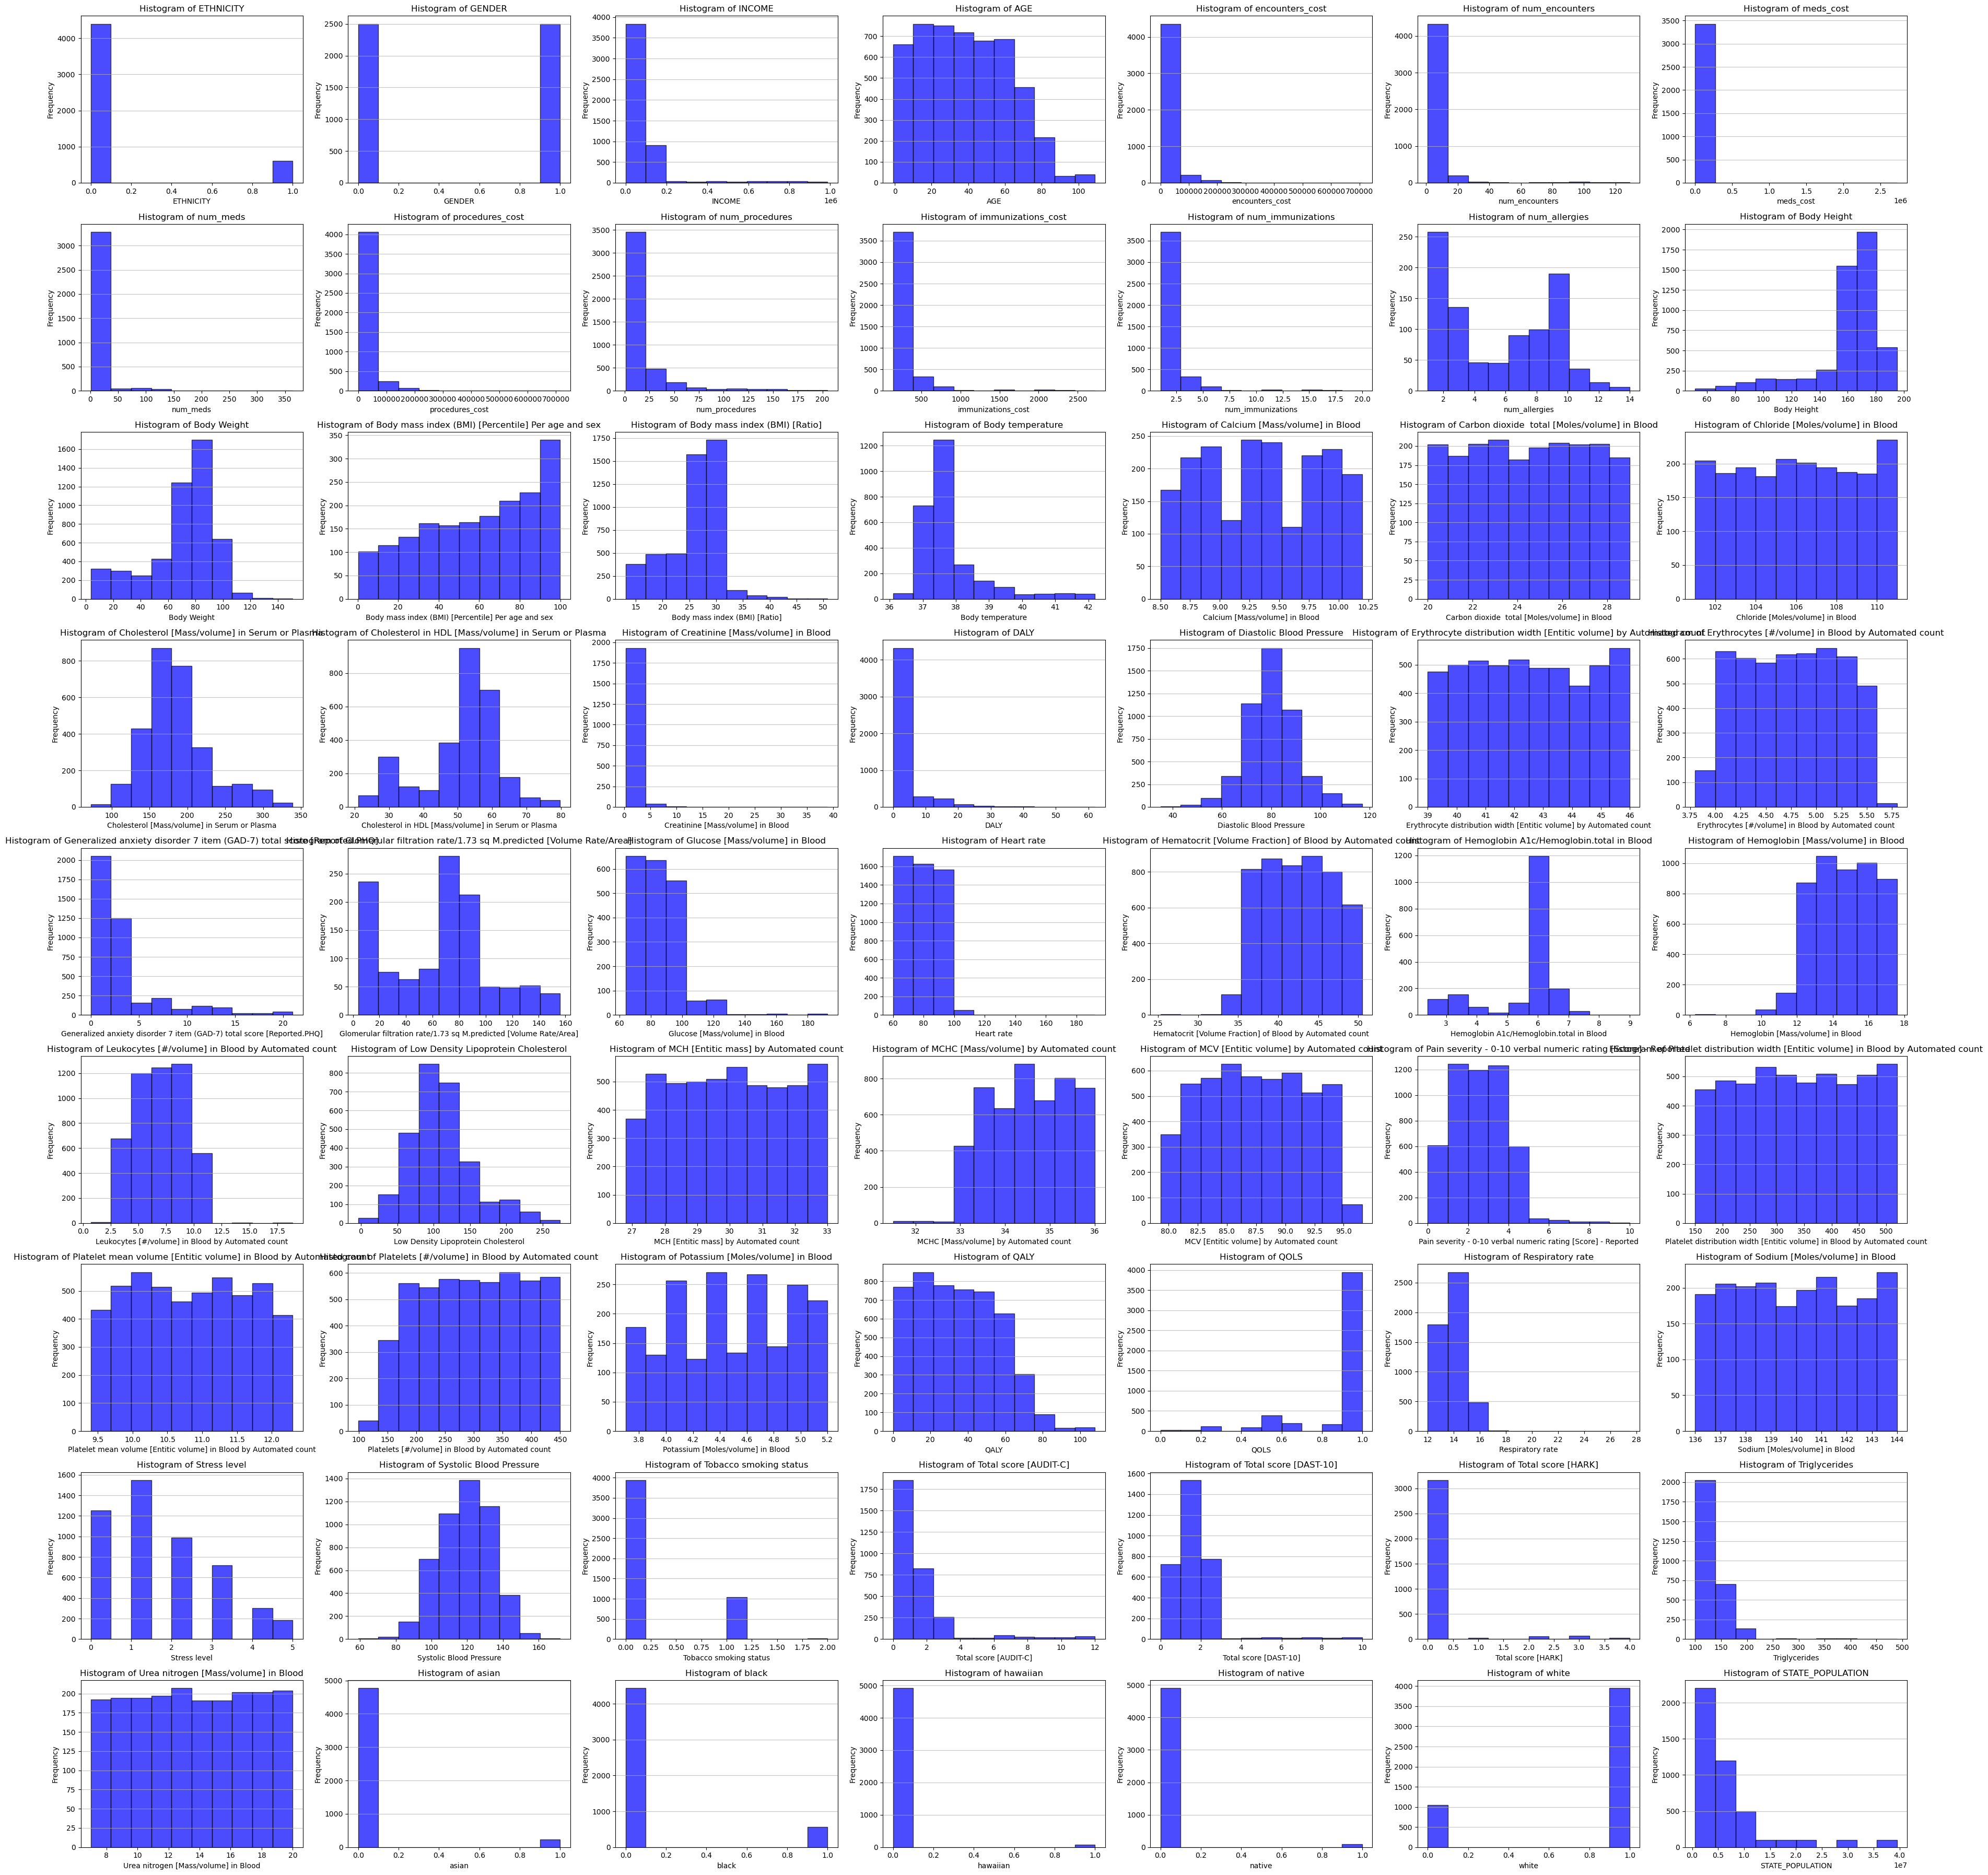

In [100]:
num_cols = 7
num_rows = (len(df.columns) + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(36, 4 * num_rows))
axs = axs.flatten()

for i, column in enumerate(df.columns):
    axs[i].hist(df[column], bins=10, alpha=0.7, color='blue', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y', alpha=0.75)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

There is a lot of variety in the distributions of the features shown above. Some follow very normal distributions, including body weight, BMI, and diastolic and systolic blood pressure. Others follow somewhat uniform distributions, including age, erythrocyte distribution width, erythrocytes in blood, platelet distribution width, platelet mean volume, and platelets in blood. Many features have right skewed distributions, such as income, state population, number of encounters, number of procedures, number of immunizations, generalized anxiety score, heart rate, pain severity, respiratory rate, and stress level.

Next, scatterplots are created with each feature on the x axis and the target feature, encounters cost, on the y axis. This will reveal any correlations between encounters cost and the features that would be useful to know heading into modeling.

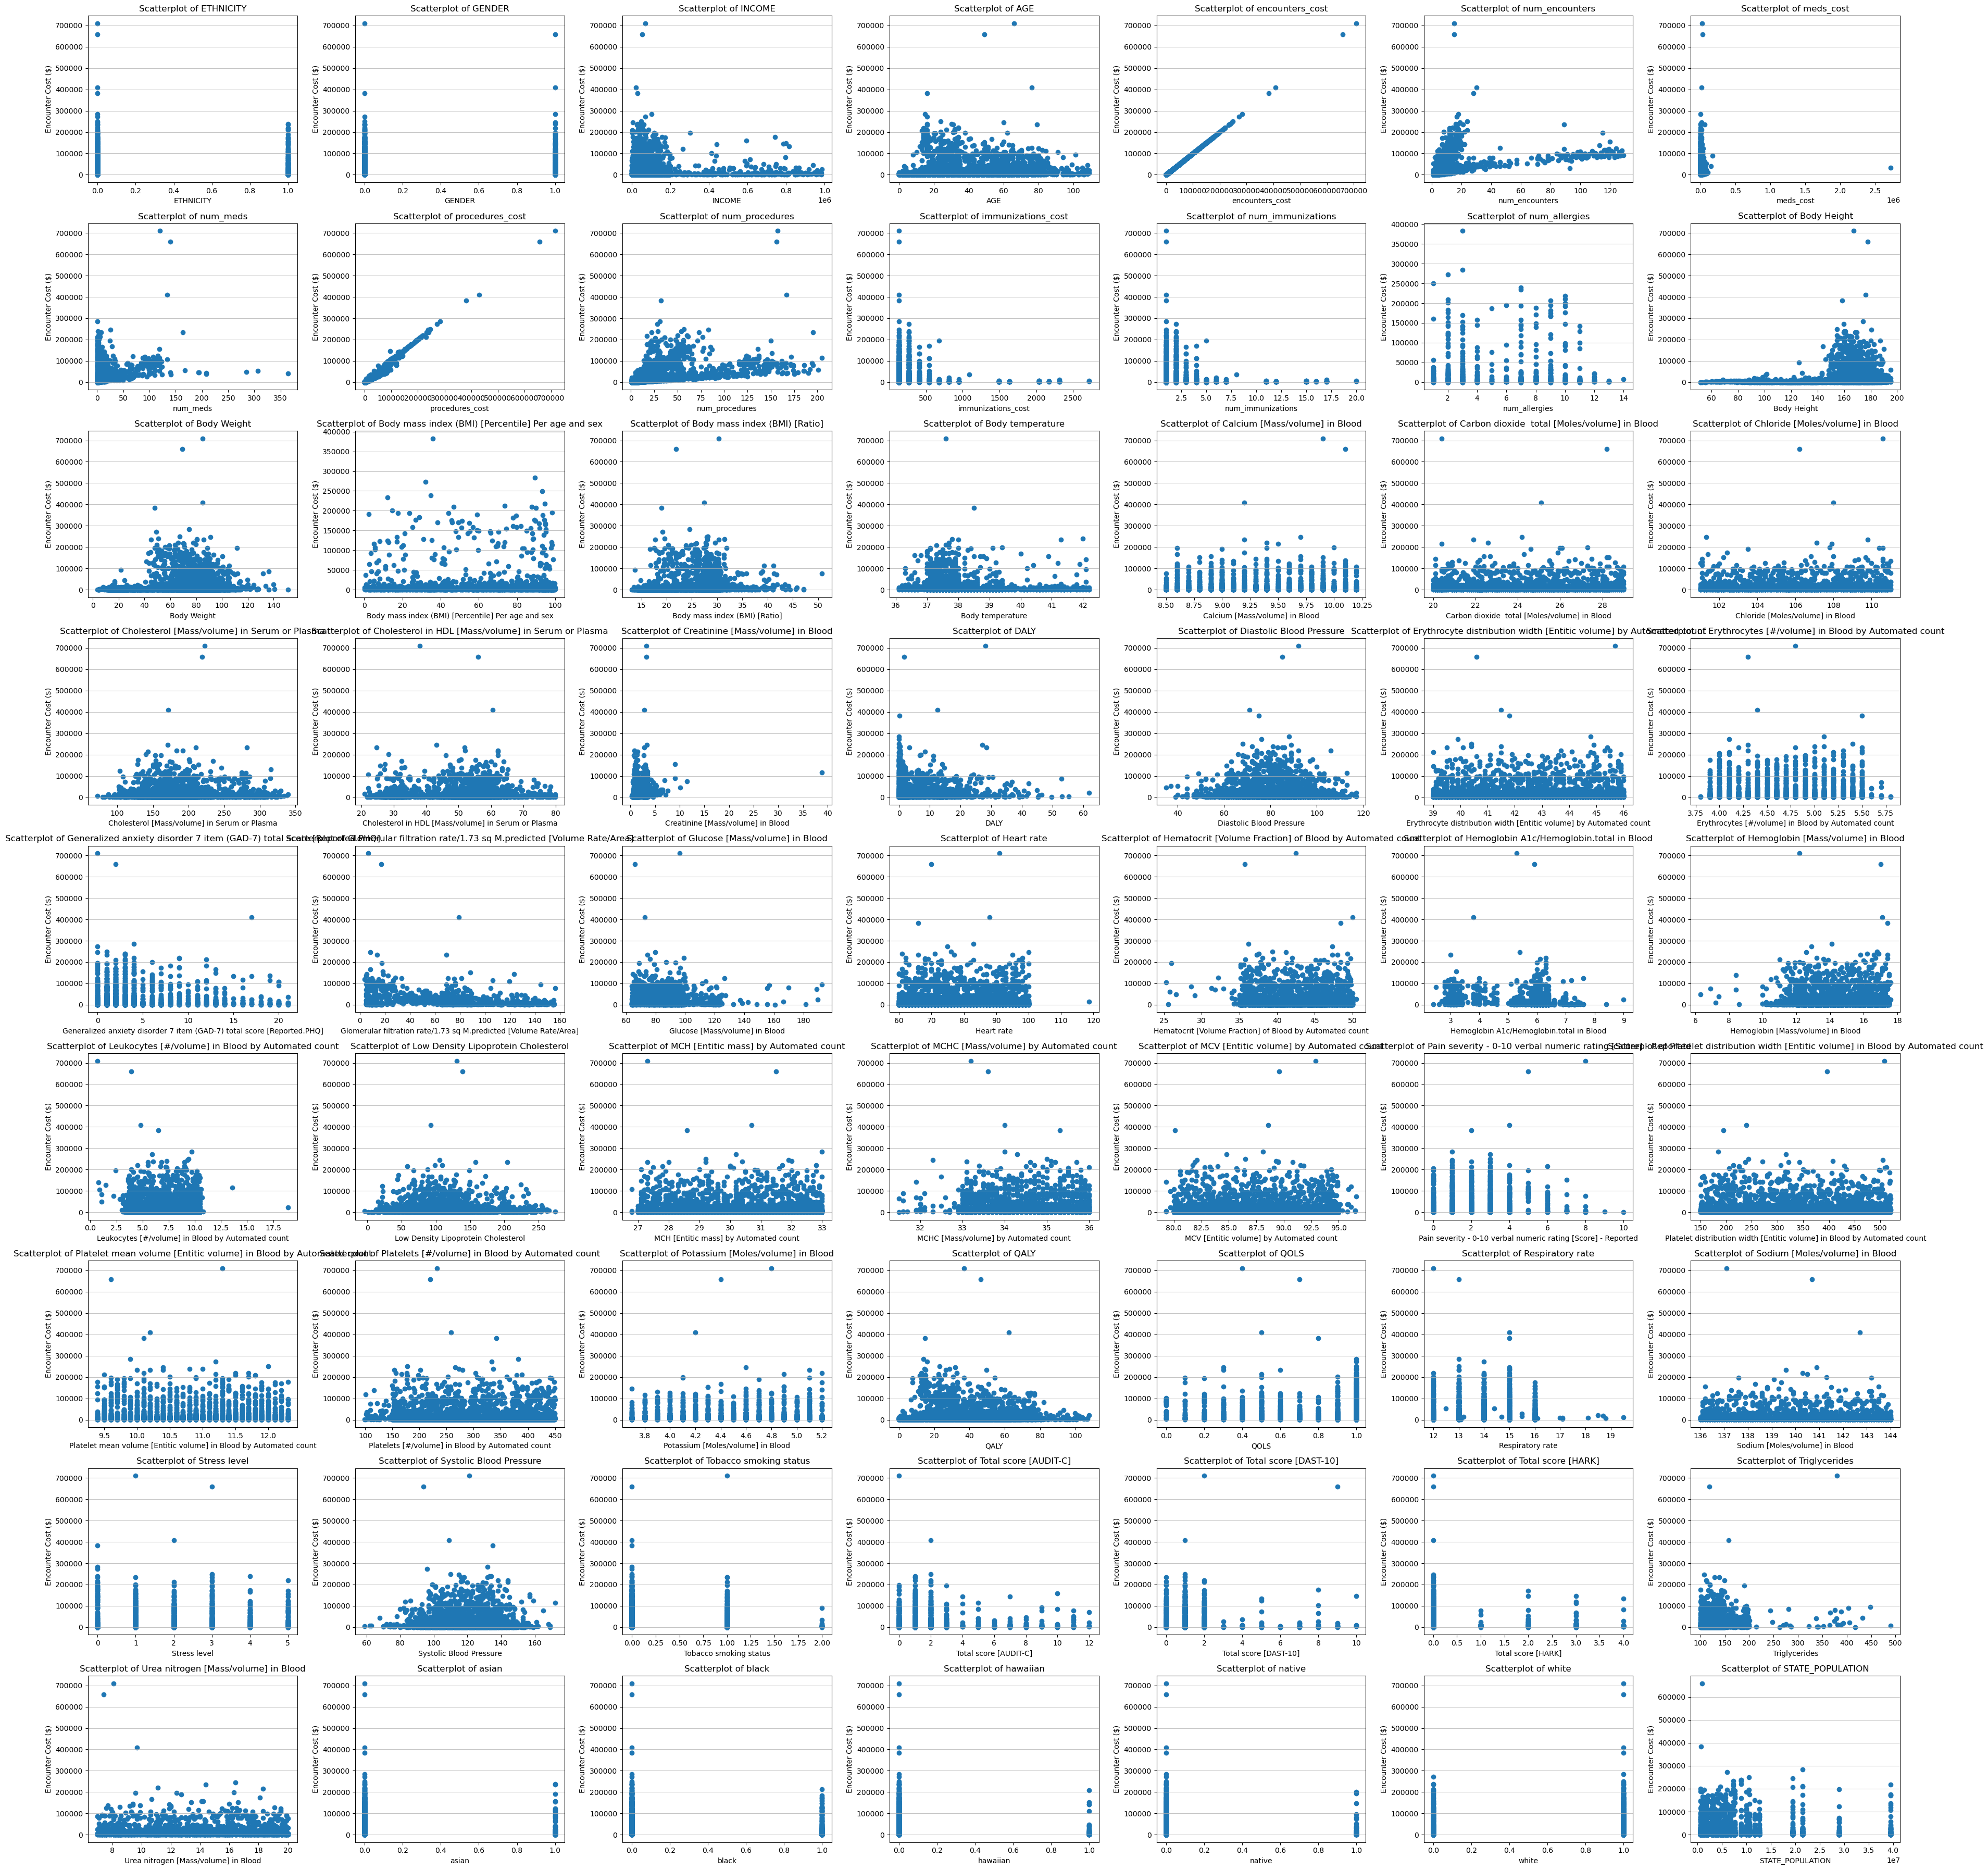

In [103]:
num_cols = 7
num_rows = (len(df.columns) + num_cols - 1) // num_cols 

fig, axs = plt.subplots(num_rows, num_cols, figsize=(36, 4 * num_rows))
axs = axs.flatten()

for i, column in enumerate(df.columns):
    axs[i].scatter(df[column], df['encounters_cost'])
    axs[i].set_title(f'Scatterplot of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Encounter Cost ($)')
    axs[i].grid(axis='y', alpha=0.75)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

There are not too many clear correlations with encounters cost. However, there are a couple of key relationships that should be noted. There is a strong positive correlation between procedures cost and encounters cost. This makes sense, as procedures cost refers to the cost of whatever procedure was performed on a patient during an encounter. Since this variable is so strongly related to the target feature, it will be removed from the analysis. There are also positive correlations between the number of encounters and the number of procedures and encounters cost, which also makes sense. These variables will remain in the analysis for now, since individual procedures and encounters would have variable costs. Another visible positive correlation is height, and a few negative correlations include income, immunization cost, and number of immunizations. Other than that, there are not too many very clear relationships, so it will be informative to see which features are most important in the modeling stage of this project.

In [105]:
df = df.drop('procedures_cost', axis = 1)

Additionally, a heatmap of correlation coefficients is created to visualize correlations between features.

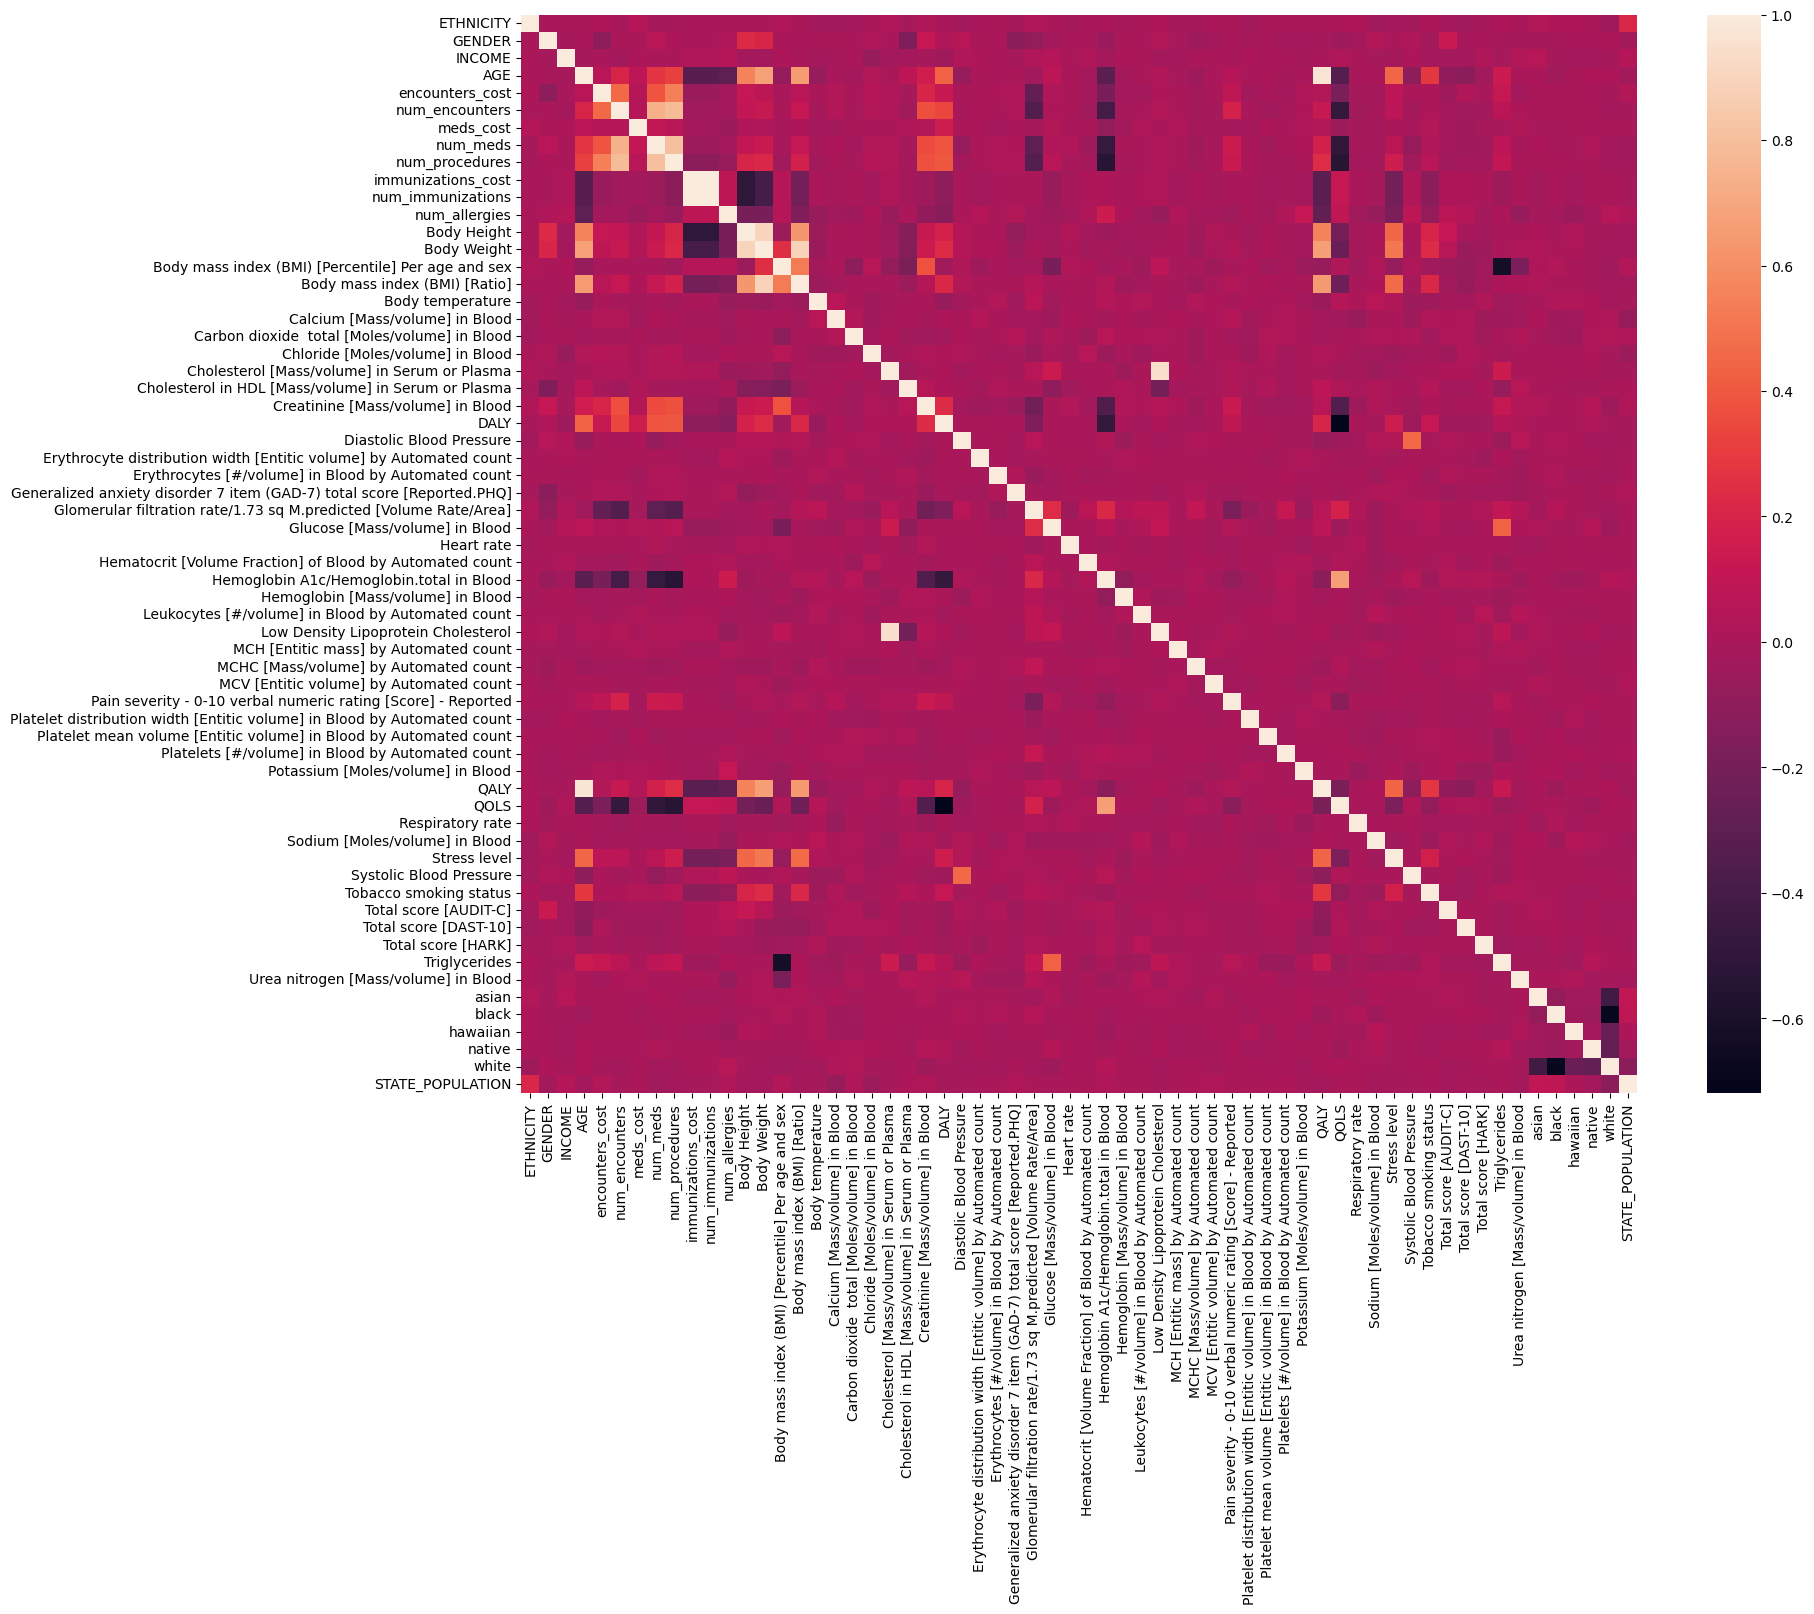

In [107]:
plt.subplots(figsize=(18,14))
sns.heatmap(df.corr(numeric_only=True));

In [108]:
pd.options.display.max_rows = 63
df.corr(numeric_only=True)['encounters_cost'].sort_values()

Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area]          -0.278913
Hemoglobin A1c/Hemoglobin.total in Blood                                   -0.192070
QOLS                                                                       -0.186770
GENDER                                                                     -0.106947
immunizations_cost                                                         -0.058181
num_immunizations                                                          -0.058181
Total score [AUDIT-C]                                                      -0.038677
MCHC [Mass/volume] by Automated count                                      -0.025478
Leukocytes [#/volume] in Blood by Automated count                          -0.021745
Hemoglobin [Mass/volume] in Blood                                          -0.021477
Sodium [Moles/volume] in Blood                                             -0.021174
Platelets [#/volume] in Blood by Automated count                 

As identified in the scatterplots, some features that appear to be correlated with encounters cost include number of procedures, number of encounters, and number of medications.

Lastly, boxplots of integer features will be observed to determine differences in distributions of these features versus encounter cost. Since there are many high outliers in encounter cost, the y axis will be limited to $75,000 so that the box can be seen clearly.

In [111]:
int_cols = df.select_dtypes(include='int')
int_cols = int_cols.drop(['INCOME', 'AGE'], axis = 1)
int_cols['encounters_cost'] = df['encounters_cost']

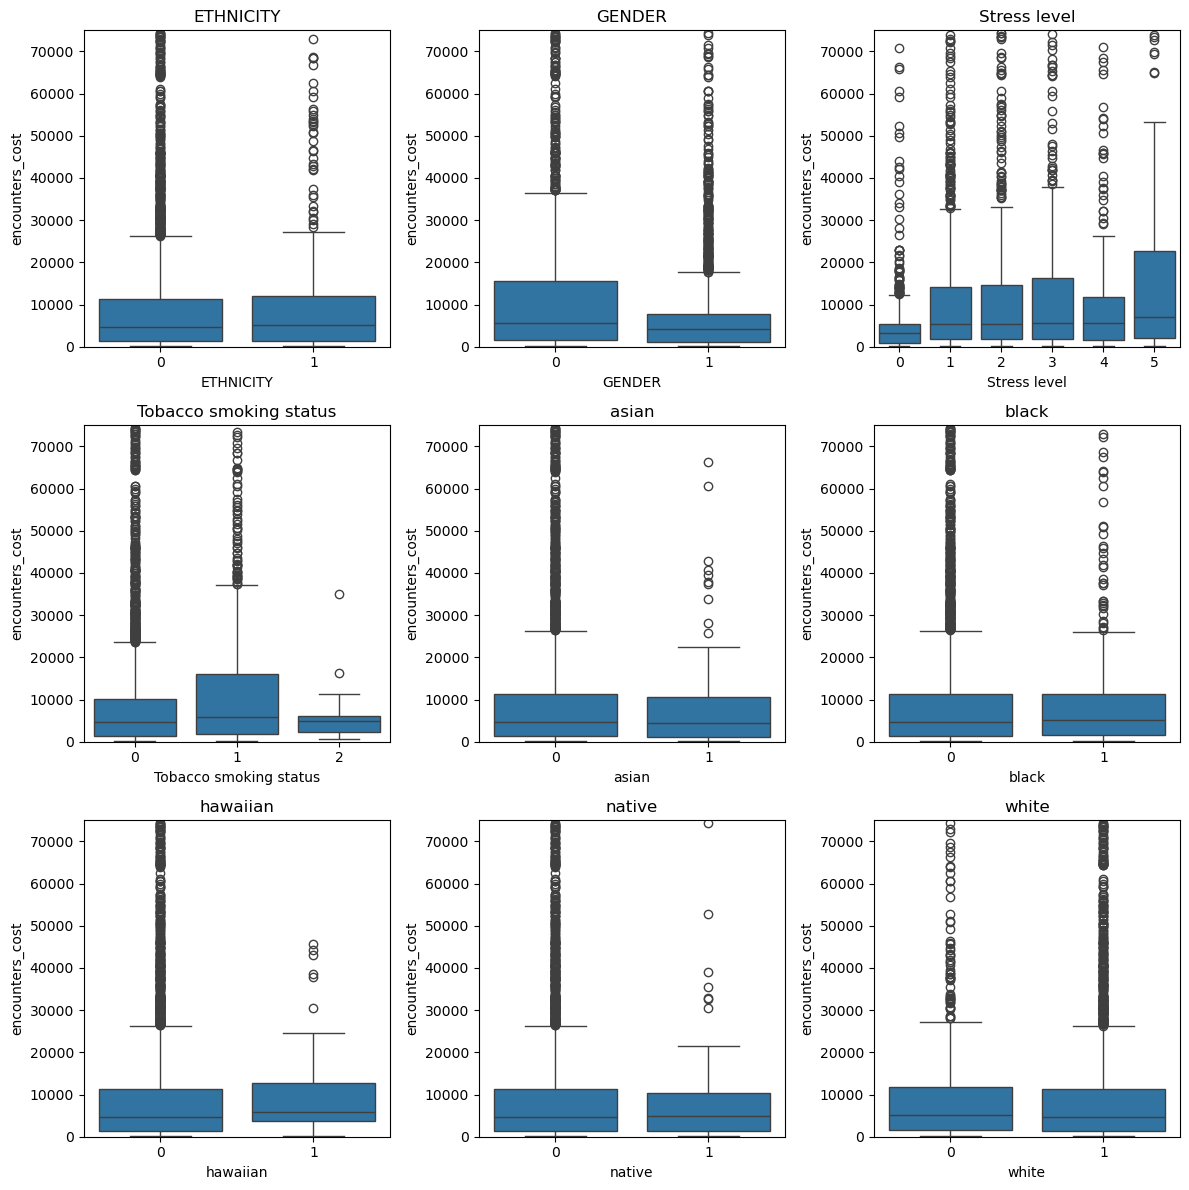

In [112]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
i, j = 0, 0
for column in int_cols:
    if column == 'encounters_cost':
        break
    if j == 3:
        j = 0
        i += 1   
    sns.boxplot(x = column, y = 'encounters_cost', data = int_cols, ax=axes[i, j])
    axes[i, j].set_title(column)
    axes[i, j].set_ylim(0, 75000)
    j += 1
plt.tight_layout()
plt.show()

There do not appear to be large differences between ethnicity or race. Males have a higher interquartile range of encounters costs compared to females.

In the EDA section of this project, relationships between variables were analyzed to see if there were any potential correlations between encounters cost and all other features of the dataset. The histograms of the features showed a wide variety of distributions for the variables, which makes sense since there are so many different types of features and medical measurements present. The scatterplots of encounter cost versus each feature also displayed a variety of relationships, most of which did not appear too strongly positive or negative. The heatmap of correlation coefficients further confirmed that there were only a few features with a strong positive or negative correlation with the target feature. Lastly, the boxplots showed some differences in the distribution of encounters costs when grouped by different integer variables. In the next step of the project, it will be necessary to decide how to impute missing values and/or which features to remove from the analysis. Additionally, different models and parameters will be tested to determine if medical encounters costs can be predicted from patient data.

Finally, the dataframe will be saved as a csv to use in subsequent steps of this capstone.

In [116]:
df.to_csv('../data/synthea_eda.csv')